In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix,f1_score,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

# Preprocessing

In [4]:
df=pd.read_csv('./data/data_titanic.csv')#,sep=';')

In [5]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
df1=df.drop(columns=['Cabin','Ticket','PassengerId'])

In [27]:
df1.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [57]:
df1['Age'].fillna(round(df1["Age"].mean(),1),inplace=True)
df1['Embarked'].fillna('S',inplace=True)

In [12]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

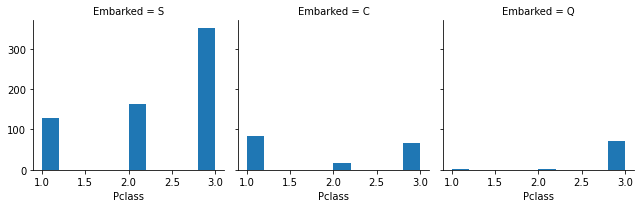

In [13]:
y=sns.FacetGrid(df1,col='Embarked')
y.map(plt.hist,'Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

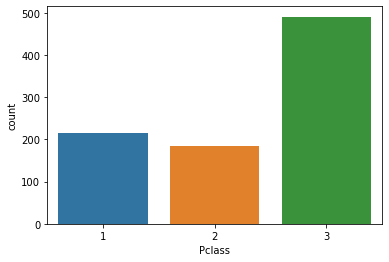

In [14]:
sns.countplot(x='Pclass',data=df1)

In [18]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )



In [45]:
df1["Title"] = df1["Name"].str.split(',').str[1].str.split(".").str[0]
df1=df1.drop(columns=['Name'])

In [46]:
Title_Dictionary = {

                    " Capt":       "Officer",

                    " Col":        "Officer",

                    " Major":      "Officer",

                      " Dr":         "Officer",

                    " Rev":        "Officer" ,

                    " Jonkheer":   "Royalty",

                    " Don":        "Royalty",

                    " Sir" :       "Royalty",

                   " Lady" :      "Royalty" ,

                  " the Countess": "Royalty",

                    " Dona":       "Royalty",

                    " Mme":        "Miss",

                    " Mlle":       "Miss",

                    " Miss" :      "Miss",

                    " Ms":         "Mrs",

                    " Mr" :        "Mrs",

                    " Mrs" :       "Mrs" ,

                    " Master" :    "Master"

                    }

In [47]:
df1['Title'].replace(Title_Dictionary,inplace=True)

In [48]:
label_encoder=LabelEncoder()
#x_train['Embarked']=label_encoder.fit_transform(x_train['Embarked'])
#x_test['Embarked']=label_encoder.transform(x_test['Embarked'])
df1['Embarked']=label_encoder.fit_transform(df1['Embarked'])


In [49]:
label_encoder=LabelEncoder()
#x_train['Sex']=label_encoder.fit_transform(x_train['Sex'])
#x_test['Sex']=label_encoder.transform(x_test['Sex'])
df1['Sex']=label_encoder.fit_transform(df1['Sex'])


In [50]:
label_encoder=LabelEncoder()
#x_train['Title']=label_encoder.fit_transform(x_train['Title'])
#x_test['Title']=label_encoder.transform(x_test['Title'])
df1['Title']=label_encoder.fit_transform(df1['Title'])


In [58]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,2
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,2,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,3
887,1,1,0,19.0,0,0,30.0000,2,1
888,0,3,0,29.7,1,2,23.4500,2,1
889,1,1,1,26.0,0,0,30.0000,0,2


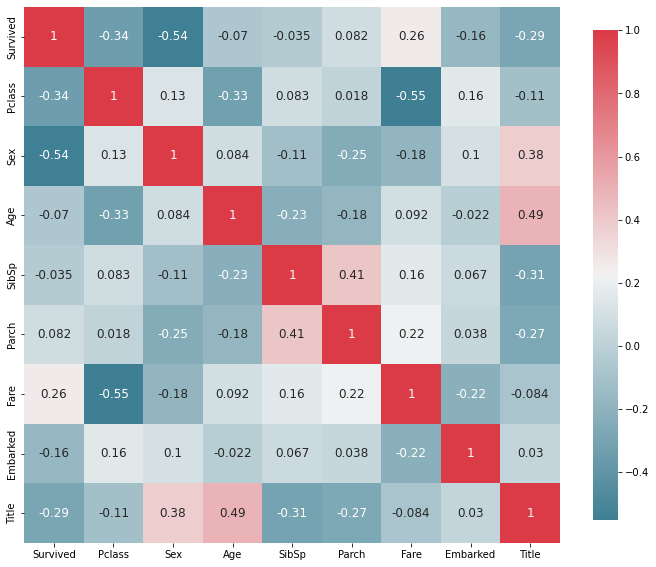

In [59]:
plot_correlation_map(df1)


In [60]:
X=df1.drop(columns=['Survived'])
Y=df1['Survived']

In [61]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [62]:
x_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

### logistic regression using all the features

In [63]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [64]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [65]:
print('the score of the training data is :',lr.score(x_train,y_train))
print('the score of the testing data is :',lr.score(x_test,y_test))
print('-'*100)
print('the f1 of the training data is :',f1_score(y_train,y_pred_train))
print('the f1 of the testing data is :',f1_score(y_test,y_pred_test))

the score of the training data is : 0.8057784911717496
the score of the testing data is : 0.8171641791044776
----------------------------------------------------------------------------------------------------
the f1 of the training data is : 0.7408993576017131
the f1 of the testing data is : 0.7407407407407408


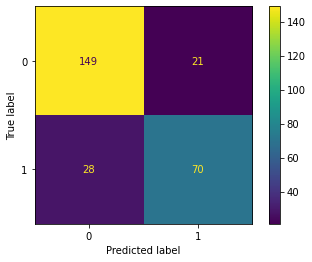

In [66]:
plot_confusion_matrix(lr, x_test, y_test)  
plt.show()

### logistic regression using few the features

In [68]:
x_train=x_train.drop(columns=['Age','SibSp','Parch'])
x_test=x_test.drop(columns=['Age','SibSp','Parch'])

In [69]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [70]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [71]:
print('the score of the training data is :',lr.score(x_train,y_train))
print('the score of the testing data is :',lr.score(x_test,y_test))
print('-'*100)
print('the f1 of the training data is :',f1_score(y_train,y_pred_train))
print('the f1 of the testing data is :',f1_score(y_test,y_pred_test))

the score of the training data is : 0.7817014446227929
the score of the testing data is : 0.8171641791044776
----------------------------------------------------------------------------------------------------
the f1 of the training data is : 0.7178423236514523
the f1 of the testing data is : 0.7461139896373057


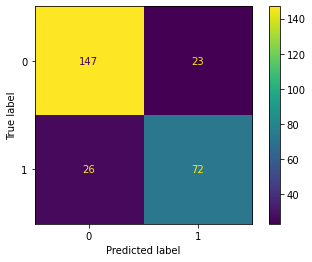

In [72]:
plot_confusion_matrix(lr, x_test, y_test)  
plt.show()